# Description: This is sentiment Analysis program that parses the tweets fetched  from  twitter using python

In [44]:
import tweepy
from textblob import TextBlob
from  wordcloud import WordCloud

In [45]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [46]:
# Twitter API  credentials
consumerKey = '*********************************'
consumerSecret = '***************************************************'

access_token = '********************************************'
access_token_secret = '***********************************************'

#Please create above access key from https://developer.twitter.com/


In [47]:
# Create the authentication  object
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)

In [48]:
#Set the access token and access token secret
authenticate.set_access_token(access_token, access_token_secret)

In [49]:
api = tweepy.API(authenticate)

In [50]:
#Extract  100 tweets from the twitter user
posts = api.user_timeline(screen_name= "BillGates",count=100,lang="en",tweet_mode="extended")

In [51]:
#Print the last 7 tweets  from the account
print("Show  the 7 recent tweets: \n")
i=1
for tweet in posts[0:7]:
    print(str(i) + ') '+ tweet.full_text + '\n')
    i=i+1


Show  the 7 recent tweets: 

1) RT @MichelleObama: Here's what #Juneteenth means to me: https://t.co/KlOoYwdzD5

2) RT @NavigatingNikki: “It’s that clarity of language about the VALUE of black life in America that distinguishes #Juneteenth as emancipation…

3) RT @nationalbook: "And I’ll never lose my faith that you and I can create an anti-racist America where racial disparities are nonexistent.…

4) RT @ClintSmithIII: When I think of emancipation, I think of all of the people who fought for freedom but who never got a chance to experien…

5) RT @kcarterjackson: Happy Juneteenth fam! My latest for the @TheAtlantic. Find joy today! The images from the article alone are giving me l…

6) RT @JohnBKing: Thinking today about my great-grandfather &amp; his family who were enslaved here in Montgomery County, Maryland (just about 25…

7) RT @ava: “Only those feigning blindness fail to see the body of work we are, and the work of body we have done. 

Everything is what it is…



In [52]:
#Create a dataframe with a column called tweets

In [53]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [54]:
df.head()

,Tweets
0,RT @MichelleObama: Here's what #Juneteenth mea...
1,RT @NavigatingNikki: “It’s that clarity of lan...
2,"RT @nationalbook: ""And I’ll never lose my fait..."
3,RT @ClintSmithIII: When I think of emancipatio...
4,RT @kcarterjackson: Happy Juneteenth fam! My l...


In [55]:
#Clean the text
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #Removing @mentions
    text = re.sub(r'#','',text) # Removing the '#'symbol
    text = re.sub(r'RT[\s]+','',text)# Removing RT
    text = re.sub(r'https?:\/\/\S+','',text)# Removing hyperlink
    text = re.sub(r':','',text)
    text = re.sub(r'"','',text)
    return text
    

In [56]:
#Cleaning the text
df['Tweets']=df['Tweets'].apply(cleanTxt)
df

,Tweets
0,Here's what Juneteenth means to me
1,“It’s that clarity of language about the VALU...
2,And I’ll never lose my faith that you and I c...
3,"When I think of emancipation, I think of all ..."
4,Happy Juneteenth fam! My latest for the . Fin...
...,...
95,Solving the world’s toughest challenges—like f...
96,Progress isn’t always easy to see. These chart...
97,America’s tax system will be top of mind for m...
98,If your New Year’s resolution is to be healthi...


In [57]:
#Create a function to get the subjectively
#def getSubjectivity(text):
 #   return TextBlob(text).sentiment.subjectively

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


In [90]:
#create two new columns
#df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

In [91]:
df

,Tweets,getPolarity,Polarity
0,Here's what Juneteenth means to me,0.000000,0.000000
1,“It’s that clarity of language about the VALU...,-0.166667,-0.166667
2,And I’ll never lose my faith that you and I c...,0.000000,0.000000
3,"When I think of emancipation, I think of all ...",0.000000,0.000000
4,Happy Juneteenth fam! My latest for the . Fin...,0.833333,0.833333
...,...,...,...
95,Solving the world’s toughest challenges—like f...,0.206061,0.206061
96,Progress isn’t always easy to see. These chart...,0.466667,0.466667
97,America’s tax system will be top of mind for m...,0.400000,0.400000
98,If your New Year’s resolution is to be healthi...,0.418182,0.418182


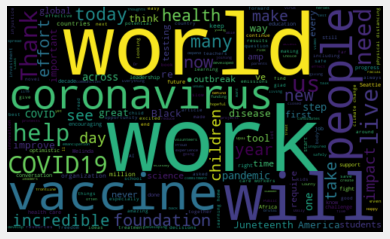

In [94]:
#Plot the word cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud= WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()


In [92]:
# Create  a function  to compute the negative and positive analysis.

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'        

In [105]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [95]:
df

,Tweets,getPolarity,Polarity,Analysis
0,Here's what Juneteenth means to me,0.000000,0.000000,Neutral
1,“It’s that clarity of language about the VALU...,-0.166667,-0.166667,Negative
2,And I’ll never lose my faith that you and I c...,0.000000,0.000000,Neutral
3,"When I think of emancipation, I think of all ...",0.000000,0.000000,Neutral
4,Happy Juneteenth fam! My latest for the . Fin...,0.833333,0.833333,Positive
...,...,...,...,...
95,Solving the world’s toughest challenges—like f...,0.206061,0.206061,Positive
96,Progress isn’t always easy to see. These chart...,0.466667,0.466667,Positive
97,America’s tax system will be top of mind for m...,0.400000,0.400000,Positive
98,If your New Year’s resolution is to be healthi...,0.418182,0.418182,Positive


In [101]:
#Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+ ')'+sortedDF['Tweets'][i])
        print()
        j=j+1
              
    

1) Happy Juneteenth fam! My latest for the . Find joy today! The images from the article alone are giving me l…

2) Proud to share my thoughts in ’s “injustice issue” on (and for) our beloved young people I call the TrayvonGene…

3) Opal is 93 years old and a great interview. Take a listen 

4)I am committed to listening and learning more about systemic racism and what I can do with my actions and words to help create a more equal and just future. Black lives matter.

5) Today world leaders pledged to fully support ’s mission to give more children access to lifesaving vaccines and b…

6)I continue to be inspired by all of the volunteers (including many retired health care workers and teachers) on the front lines of the fight against coronavirus each day. 

7)Here are five books to read this summer if you want to learn more about pandemics or are looking for a distraction  

8)Melinda recommended that I read The Choice, and I’m glad she did. I think many people will find comfort right n

In [102]:
#Print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+ ')'+sortedDF['Tweets'][i])
        print()
        j=j+1           
    

1) “It’s that clarity of language about the VALUE of black life in America that distinguishes Juneteenth as emancipation…

2) “Only those feigning blindness fail to see the body of work we are, and the work of body we have done. 

Everything is what it is…

3) Juneteenth recognizes &amp; celebrates Black people’s freedom and the end of slavery in the US!  19 Jun 1865 Union Army Genera…

4)_Nyongo 1. This is Opal Lee, the force behind the movement to make Juneteenth a national holiday. Also known as Freedom Day, it…

5)…in policing, criminal justice, education, health care, housing, the workplace and all other areas of their lives.

6)The horrifying killings of George Floyd, Ahmaud Arbery, Breonna Taylor and far too many other Black people—and the protests they sparked—are shining a light on the brutal injustices that Black people experience every day…

7) The video of George Floyd’s brutal death broke my heart. I’ve watched the protests that followed and have felt overwhelme…

8)I’m ho

In [109]:
#Plot the Polarity and subjectively
#plt.figure(figsize=(8,6))
#for i in range(0,df.shape[0]):
 #   plt.scatter(df['Polarity'][i],color='Blue')
#plt.title('Sentimental Analysis')
#plt.xlabel('Polarity')
#plt.ylabel
    
    




In [110]:
#Get percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0]) *100,1)


69.0

In [114]:
#Get percentage of Negative tweets.
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round( (ntweets.shape[0] / df.shape[0]) *100,1)


18.0

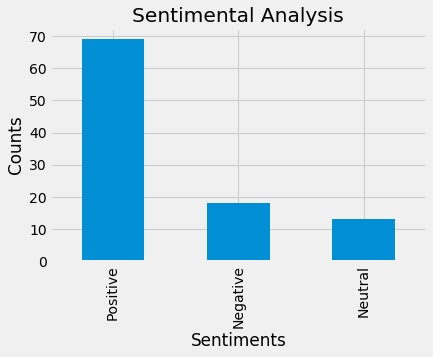

In [118]:
#Show count value

df['Analysis'].value_counts()

#plot and visuliaze the value
plt.title('Sentimental Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()
    
